<a href="https://colab.research.google.com/github/neon-iot/communication_labs/blob/main/SpectrumSensingEnergyDetectionAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center> Comunicaciones Digitales </center>
## <center> Trabajo Final - 2022</center>
## <center> Sensado del espectro - Revisión del Método de Detección de Energía </center>

$ \\ \\ \\ $
Felipe Montero

Marcos Laureano Olocco

Octavio Ulla

Fermín Verdolini

### Introducción

El espectro de radiofrecuencia representa un recurso escaso y finito (limitado), el cual es utilizado por diversos servicios, como por ejemplo transmisiones de radio, comunicaciones por radio, comunicaciones satelitales, comunicaciones marítimas, entre otros$^{[1]}$. La asignación de frecuencias de esta región del espectro electromagnético es manejado por las autoridades locales quienes son responsables de garantizar la mínima interferencia entre diferentes tecnologías y emisiones de radio$^{[1][2]}$. Los problemas asociados con el rango finito de frecuencias disponibles estan relacionados con la creciente demanda del espectro, debido al surgimiento y abundancia de tecnologías inalámbricas y a la proliferación de aplicaciones radiales en el marco del internet de las cosas (IoT). Sin embargo, hay evidencia de que existen regiones del espectro no utilizadas, lo que significa un desperdicio de la totalidad del espectro$^{[3]}$. El interés en un mejor uso del espectro ha impulsado, en gran medida, el surgimiento de las radios cognitivas definidas por software (sdr)$^{[3][4]}$. Una radio cognitiva definida por software es un sistema de software capaz de explorar el espectro de radiofrecuencia y determinar que frecuencias del mismo se encuentran sin usar, con fin de transmitir en alguna frecuencia libre enontrada$^{[1]}$.

La radio cognitiva debe ser capaz de aprender a sensar el espectro, decidir que frecuencia usar y ajustarse dinamicamente a lo largo de su funcionamiento$^{[1]}$. Algunas de las técnicas más utilizadas para sensar el espectro son la detección de energía$^{[1]-[9]}$, detección mediante filtro adaptado$^{[2],[5],[6]}$ y detección de características cicloestacionarias$^{[1],[2],[6]}$. La detección de energía consiste en medir la energía de la señal recibida y decidir sobre la presencia o ausencia de usuarios en base a comparar la energía medida con un valor umbral$^{[5]}$.

En el presente trabajo se estudia el método de detección de energía. En primer lugar se hace una revisión teórica del modelo y se obtienen curvas que predicen el compotamiento del sistema. Luego, se simula la transimición y recepción de una señal bajo diferentes condiciones de relación señal ruido y se comparan los resultados obtenidos con el comportamiento predicho por el modelo.

$$$$


### Modelo del sistema

La radio cognitiva debe ser capaz de determinar si la señal recibida consiste en una señal de ruido o en una señal transmitida por un usuario sumada a una señal de ruido, es decir se debe determinar si existe señal que sea transmitida por un usuario. Matemáticamente, el problema se puede formular como el siguiente test de hipótesis$^{[1]-[8]}$:

$$$$

$$ 
  Y(n) = \begin{cases} W(n) \qquad\qquad : H_{0}  \\ W(n) + S(n) \space\space\space : H_{1}  \end{cases} \qquad (1)
$$

$$$$

Donde $n = 0, 1, 2, 3, ..., N$ representa el número de muestras (periodo de detección). $Y(n)$ representa la señal recibida por la radio cognitiva. $S(n)$ es la señal transmitida por un usuario, la cual se asume ser un proceso aleatorio independiente e identicamente distribuido de media $0$ y varianza $\sigma_{s}^{2}$$^{[8]}$. $W(n)$ corresponde a la señal de ruido, que se asume ser un proceso aleatorio tipo AWGN, independiente identicamente distribuido, de media $0$ y variazna $\sigma_{n}^{2}$$^{[1],[3],[8]}$.

El estadístico de prueba para el test de hipótesis corresponde a$^{[5],[7],[8],[9]}$:

$$$$

$$
\begin{align*}
&H_{1} \\[-5pt]
T_{d} = \sum_{k=0}^N |Y(k)|^2 &\gtreqless \lambda \\[-5pt]
&H_{0}
\end{align*} \qquad\qquad\qquad\qquad (2)
$$

$$$$

Donde $\lambda$ es el valor energía umbral. Esto significa que si $T_{d}$ es menor que $\lambda$ se debe optar por la hipótesis nula ($H_{0}$) y decidir que no existe señal transmitida por un usuario. En cambio si $T_{d}$ es mayor o igual a $\lambda$, se debe optar por la hipótesis alternativa ($H_{1}$) y decidir que existe señal transmitida en el rango de frecuencias sensado.

Se puede demostrar que, de acuerdo al teorema central del límite, si N es suficientemente grande, la variable aleatoria $T_d$ puede ser aproximada a una variable aleatoria de distribución normal y el test de hipótesis puede ser redefinido de la siguiente forma$^{[5],[7],[8],[9]}$:

$$$$

\begin{align*}
  & T_{d} \sim \begin{cases} Normal(\mu_{0} , \sigma_{0}^2) \qquad : H_{0} \\  Normal(\mu_{1} , \sigma_{1}^2) \qquad : H_{1} \end{cases} \qquad\quad (3)
  \\
  & \begin{cases} \mu_{0} = N\sigma_{n}^2 \quad\qquad\qquad\qquad : H_{0} \\  \mu_{1} = N\sigma_{n}^2(\gamma + 1) \space\space\quad\qquad\space\space : H_{1} \end{cases} \qquad\space\space\space\space (4)
  \\
  & \begin{cases} \sigma_{0}^2 = 2N\sigma_{n}^4 \quad\quad\qquad\qquad\space\space : H_{0} \\  \sigma_{1}^2 = 2N\sigma_{n}^4(\gamma + 1)^2 \quad\qquad : H_{1} \end{cases} \qquad\quad (5)
\end{align*}

$$$$

Donde $\gamma = (\sigma_{s}^2/\sigma_{n}^2)$ es la relación señal ruido.

$$$$

### Umbral de detección óptimo

A partir del modelo planteado para el test de hipótesis, se definen la probabilidad de detección $P_{d}$ como la probabilidad de detectar la señal $S(n)$, cuando $T_{d} > \lambda$; probabilidad de falso positivo (falsa alarma), $P_{f}$ como como la probabilidad de que $T_{d} > \lambda$ cuando la señal primaria $S(n)$ no está presente; probabilidad de falso negativo, $P_{m}$ como la probabilidad $T_{d} < \lambda$ cuando la señal $S(n)$ está presente$^{[1],[4],[5],[7],[8],[9]}$.

$$$$

\begin{align*}
& P_{d} = prob(T_{d} > \lambda|H_{1}) \qquad\qquad (6) \\
& P_{d} = \frac{1}{2} erfc\left(\frac{\lambda-\mu_{1}}{\sqrt{2\sigma_{1}^2}}\right) \qquad\quad (7) \\
& P_{f} = prob(T_{d} > \lambda|H_{0}) \qquad\qquad (8) \\
& P_{f} = \frac{1}{2} erfc\left(\frac{\lambda-\mu_{0}}{\sqrt{2\sigma_{0}^2}}\right) \qquad\quad (9) \\
& P_{m} = 1 - P_{d} \qquad\qquad\qquad\quad\space\space\space (10)
\end{align*}

$$$$

Donde $erfc$ es la función error complementaria:

$$$$

$$
erfc(z) = \frac{2}{\pi}\int_z^\infty {e^{-x^2}}\,dx \qquad\qquad (11) 
$$

$$$$

Dadas las probabilidades a priori $PH_{1}$ y $PH_{0}$, que representan la presencia y ausencia del usuario primario, respectivamente, es posible definir la probabilidad de error, $P_{e}$$^{[5],[8]}$:

$$$$

$$
P_{e} = PH_{0}P_{f} + PH_{1}P_{m} \qquad\qquad (12)
$$

$$$$

A partir de estas expresiones se puede definir el valor de umbral ($\lambda$) óptimo como aquel que minimiza la probabilidad de error$^{[5],[8]}$:

$$$$

$$
\lambda = argmin_{\lambda}(P_{e}) = argmin_{\lambda}(PH_{0}P_{f} + PH_{1}P_{m}) \qquad\qquad (13)
$$

$$$$

El valor de $\lambda$ se puede obtener a partir de las ecuaciones $(7)$ y $(9)$$^{[8]}$:

$$$$

$$
  \frac{\partial P_{f}}{\partial \lambda} + \frac{\partial P_{m}}{\partial \lambda} = 0 \qquad\qquad\qquad\qquad\space (14) \\
  \frac{\partial^2 P_{e}}{\partial \lambda^2} > 0 \qquad\qquad\qquad\qquad\qquad\space\space\space\space (15)
$$

$$
\frac{\partial P_{f}}{\partial \lambda} = -\frac{1}{\sqrt{2\pi\sigma_{0}^2}}e^{-\left(\frac{\lambda-\mu_{0}}{\sqrt{2\pi\sigma_{0}^2}}\right)} \qquad\qquad (16)
$$

$$
\frac{\partial P_{m}}{\partial \lambda} = -\frac{1}{\sqrt{2\pi\sigma_{1}^2}}e^{-\left(\frac{\lambda-\mu_{1}}{\sqrt{2\pi\sigma_{1}^2}}\right)} \qquad\qquad (17)
$$

$$$$

Reemplazando $(16)$ y $(17)$ en $(14)$ y $(15)$ se obtiene una expresión analítica para $\lambda$$^{[8]}$:

$$$$

\begin{align*}
  & \lambda = \frac{-B + \sqrt{B^2-AC}}{A} \qquad\qquad\qquad (18) \\
  & A = \sigma_{1}^2 - \sigma_{0}^2 \qquad\qquad\qquad\qquad\qquad\space (19) \\
  & B = \sigma_{0}^2\mu_{1} - \sigma_{1}^2\mu_{0} \qquad\qquad\qquad\qquad\space (20) \\
  & C = \sigma_{1}^2\mu_{0}^2 - \sigma_{0}^2\mu_{1}^2 - 2\sigma_{1}^2\sigma_{0}^2\ln{\frac{\sigma_{1}}{\sigma_{0}}} \qquad (21)
\end{align*}

$$$$

Cabe mencionar que $\lambda$ también puede ser obtenido a partir de la consideración de que el test de hipótesis para el estadístico $T_{d}$ es un test de hipótesis binario$^{[10]}$, es decir:

$$$$

$$
\begin{align*}
& \hat{H} = 1 \\[-5pt]
T_{d \space Y|H}(y|1)PH(1) \quad &\gtreqless \quad T_{d \space Y|H}(y|0)PH(0) \qquad\qquad\quad (22) \\[-5pt]  
& \hat{H} = 0
\\
\\
& \hat{H} = 1 \\[-5pt]
\frac{1}{\sqrt{2\pi\sigma_{1}^2}}e^{-\left(\frac{y-\mu_{1}}{\sqrt{2\pi\sigma_{1}^2}}\right)}PH(1) \quad &\gtreqless \quad \frac{1}{\sqrt{2\pi\sigma_{0}^2}}e^{-\left(\frac{y-\mu_{0}}{\sqrt{2\pi\sigma_{0}^2}}\right)}PH(0) \qquad (23) \\[-5pt]  
& \hat{H} = 0
\\
\\
& \hat{H} = 1 \\[-5pt]
y^2(\sigma_{1}^2-\sigma_{0}^2)+y(2\sigma_{0}^2\mu_{1}-2\sigma_{1}^2\mu_{0})+\sigma_{1}^2\mu_{0}^2-\sigma_{0}^2\mu_{1}^2-2\sigma_{1}^2\sigma_{0}^2\ln{\left(\frac{\sigma_{1}}{\sigma_{0}}\frac{PH(0)}{PH(1)}\right)} \quad &\gtreqless \quad 0 \qquad\qquad\qquad\qquad\qquad\quad\quad (24) \\[-5pt]  
& \hat{H} = 0
\end{align*}
$$

$$$$

A partir de $(24)$ se obtienen las ecuaciones $(18)$, $(19)$, $(20)$ y $(21)$.

Dado que la probabilidad de falso positivo ($P_{f}$) y la probabilidad de falso negativo ($P_{m}$) son funciones del periodo de detección (ecuaciones $(4)$, $(5)$, $(7)$, $(9)$, $(10)$), se puede estimar un periodo de detección mínimo para que dichas probabilidades esten restringidas o limitadas a valores determinados. A partir de $(7)$, $(9)$ y $(10)$ se obtiene la siguiente expresión$^{[8]}$:

$$$$

$$
\begin{align*}
& P_{f}(\lambda) \leq P_{f}^* \\
& P_{m}(\lambda) \leq P_{m}^* \\ \\
& N_{min} = 4(ercf^{-1}(2P_{f}^*) - (1+\gamma)ercf^{-1}(2P_{d}^*))^2\gamma^{-2} \quad (25)
\end{align*}
$$

$$$$

### Incertidumbre de ruido
$ \\ $
En las ecuaciones presentadas hasta el momento se puede observar que $\lambda$ es función de $\sigma_{n}^2$. En la mayoría de los sistemas de comunicación el ruido es un agregado de varias fuentes independientes las cuales incluyen el ruido térmico e interferencia de señales originadas en transmisores no considerados$^{[8]}$. Esto produce que el supuesto de que el ruido es aditivo blanco gausiano no siempre sea correcto. Además, la potencia de ruido puede variar en el tiempo y en función de la localización, por lo tanto asumir $\sigma_{n}^2$ constante no siempre es correcto$^{[8],[9]}$. Por lo tanto, en situaciones prácticas, $\sigma_{n}^2$ debería ser estimada por el receptor.

Es posible modelar la incertidumbre de ruido considerando que $\sigma_{n}^2 \in (\sigma_{n \space min}^2,\sigma_{n \space max}^2)$, donde $\sigma_{n \space min}^2=\sigma_{n}^2/\alpha$ y $\sigma_{n \space max}^2=\sigma_{n}^2\alpha$ representan los límites inferior y superior de $\sigma_{n}^2$, respectivamente y $\alpha$ se define como el factor de incertidumbre de ruido, con $\alpha \geq 1$$^{[8]}$.

Considerando el factor de incertidumbre de ruido, el test de hipótesis puede ser redefinido de la siguiente manera$^{[8]}$:

$$$$

\begin{align*}
  & T_{d} \sim \begin{cases} Normal(\mu_{0},\sigma_{0}^2)=(N\alpha\sigma_{n}^2,2N\alpha^2\sigma_{n}^4) \qquad\qquad\qquad\space\space : H_{0} \\  Normal(\mu_{1},\sigma_{1}^2)=(N\sigma_{n}^2(\gamma+\frac{1}{\alpha}),2N\sigma_{n}^4(\gamma+\frac{1}{\alpha})^2) \quad\space : H_{1} \end{cases} \qquad\quad (26)
\end{align*}

$$$$

En base a $(26)$, se redefinen las ecuaciones $(7)$, $(9)$.

$$$$

\begin{align*}
& P_{d} = \frac{1}{2} erfc\left(\frac{\lambda-N\sigma_{n}^2(\gamma+\frac{1}{\alpha})}{\sqrt{4N\sigma_{n}^4(\gamma+\frac{1}{\alpha})^2}}\right) \qquad\quad (27) \\
& P_{f} = \frac{1}{2} erfc\left(\frac{\lambda-N\alpha\sigma_{n}^2}{\sqrt{4N\alpha^2\sigma_{n}^4}}\right) \quad\qquad\qquad\space\space\space (28) \\
\\ \\
\end{align*}

$\lambda$ se calcula mediante $(18)$-$(21)$ con $\mu_{0}$, $\mu_{1}$, $\sigma_{0}^2$, $\sigma_{1}^2$ dados según $(26)$$^{[8]}$.

$$$$

### Comportamiento teórico y predicciones del modelo

A continuación (Figura N° 1) se muestra la distribución Gausiana de la variable $T_{d}$, de acuerdo a las ecuaciones $(3)$, $(4)$ y $(5)$, para los casos de presencia de señal ($H_{1}$) y ausencia de señal $\space\space\space$ ($H_{0}$), con un valor de $N=100$. El valor donde se intersectan ambas distribuciones corresponde a $\lambda$. Se elige arbitrariamente un valor de $\sigma_{n}^2 = 0,25$ y $SNR\space[dB] = 0$ ($\gamma = 1$).

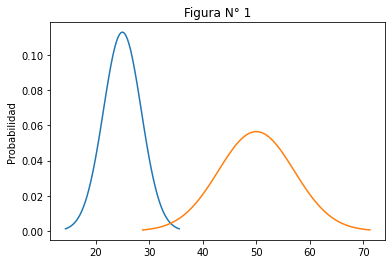

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [ ]:
from IPython.display import display, Latex
import numpy as np
from scipy import stats
from scipy import special
from scipy.optimize import minimize_scalar
import matplotlib.pyplot as plt

n_muestras = 100
varianza_ruido = 0.25
#varianza_ruido = 0.999930/2
SNRdB = 0
gamma = 10**(SNRdB/10)
varianza_senal = gamma*varianza_ruido
sigma_senal = np.sqrt(varianza_senal)
sigma_ruido = np.sqrt(varianza_ruido)

# Parametros de la distribucion normal de T, dado H0
mu_0 = n_muestras*varianza_ruido
varianza_0 = 2*n_muestras*varianza_ruido**2
sigma_0 = np.sqrt(varianza_0)
x0 = np.linspace(mu_0 - 3*sigma_0, mu_0 + 3*sigma_0, n_muestras)
T0 = stats.norm.pdf(x0, loc = mu_0, scale = sigma_0)

# Parametros de la distribucion normal de T, dado H1
mu_1 = n_muestras*varianza_ruido*(gamma + 1)
varianza_1 = 2*n_muestras*varianza_ruido**2*(gamma + 1)**2
sigma_1 = np.sqrt(varianza_1)
x1 = np.linspace(mu_1 - 3*sigma_1, mu_1 + 3*sigma_1, n_muestras)
T1 = stats.norm.pdf(x1, loc = mu_1, scale = sigma_1)

plt.plot(x0, T0)
plt.plot(x1, T1)
#plt.xticks(np.arange(int(mu_0 - 3*sigma_0 -1 ), int(mu_1 + 3*sigma_1), 20))
plt.ylabel("Probabilidad")
plt.title("Figura N° 1")
plt.show()

display(Latex(f'$\mu_{0} = {mu_0}$'))
display(Latex(f'$\sigma_{0}^2 = {varianza_0}$'))
display(Latex(f'$\sigma_{0} = {sigma_0}$'))
display(Latex(f'$\mu_{1} = {mu_1}$'))
display(Latex(f'$\sigma_{1}^2 = {varianza_1}$'))
display(Latex(f'$\sigma_{1} = {sigma_1}$'))
#print("media_T0 = %f" % mu_0)
#print("sigma_T0 = %f" % sigma_0)
#print("media_T1 = %f" % mu_1)
#print("sigma_T1 = %f" % sigma_1)

A partir de las funciones de densidad de probabilidad obtenidas, se muestra el cálculo del parámetro $\lambda$ mediante la ecuación $(18)$ y a partir de minimizar la probabilidad de error (ecuación $(13)$), utilizando un algoritmo de minimización (sección dorada). En ambos casos se considera $PH_{0} = PH_{1} = 0,5$.

In [ ]:
SNRdB = 0
PH0 = 0.5
PH1 = 1 - PH0

# Calculo de lambda mediante la expresión analítica
def calc_lambda(n_muestras, varianza_ruido, SNRdB):
    gamma = 10**(SNRdB/10)
    mu_0 = n_muestras*varianza_ruido
    varianza_0 = 2*n_muestras*varianza_ruido**2
    mu_1 = n_muestras*varianza_ruido*(gamma + 1)
    varianza_1 = 2*n_muestras*varianza_ruido**2*(gamma + 1)**2
    
    a = varianza_1 - varianza_0
    b = varianza_0*mu_1 - varianza_1*mu_0
    c = varianza_1*mu_0**2 - varianza_0*mu_1**2 - (2*varianza_1*varianza_0)*(np.log((np.sqrt(varianza_1))/(np.sqrt(varianza_0))))
    if b**2-(a*c) < 0:
        return 0
    lambda_ = (-b + np.sqrt(b**2-(a*c)))/a
    return lambda_

lambda_ = calc_lambda(n_muestras, varianza_ruido, SNRdB)

print("lambda obtenido a partir de ecuacion (18) = %f" % lambda_)

# Calculo de Pd, Pm, Pf, Pe y partir de lambda, PH0 y PH1
def calc_probs(lambda_, n_muestras, varianza_ruido, SNRdB, PH0, PH1):
    gamma = 10**(SNRdB/10)
    mu_0 = n_muestras*varianza_ruido
    varianza_0 = 2*n_muestras*varianza_ruido**2
    mu_1 = n_muestras*varianza_ruido*(gamma + 1)
    varianza_1 = 2*n_muestras*varianza_ruido**2*(gamma + 1)**2
    
    Pd = (1/2)*special.erfc((lambda_-mu_1)/(np.sqrt(2*varianza_1)))
    Pm = (1 - Pd)
    Pf = (1/2)*special.erfc((lambda_-mu_0)/(np.sqrt(2*varianza_0)))
    Pe = PH0*Pf + PH1*Pm
    return Pd, Pm, Pf, Pe

Pd, Pm, Pf, Pe = calc_probs(lambda_, n_muestras, varianza_ruido, SNRdB, PH0, PH1)
print("Pd = %f - Pm = %f - Pf = %f - Pe = %f" %(Pd, Pm, Pf, Pe))

# wrapper de calc_probs() que devuelve Pe
def calc_prob_error(lambda_, n_muestras, varianza_ruido, gamma, PH0, PH1):
    Pd, Pm, Pf, Pe = calc_probs(lambda_, n_muestras, varianza_ruido, SNRdB, PH0, PH1)
    return Pe

# obtiene el lambda que minimiza la probabilidad de error, a partir de un lambda estimado
l = minimize_scalar(calc_prob_error, args=(n_muestras, varianza_ruido, SNRdB, PH0, PH1), method="golden")

print("lambda obtenido a partir del algoritmo de minimizacion = %f" % l.x)

dif = np.round(abs((lambda_-l.x)/l.x)*100, 2)
print("Diferencia porcentual entre resultados: %f%%" %dif)

lambda obtenido a partir de ecuacion (18) = 34.012637
Pd = 0.988119 - Pm = 0.011881 - Pf = 0.005399 - Pe = 0.008640
lambda obtenido a partir del algoritmo de minimizacion = 34.012637
Diferencia porcentual entre resultados: 0.000000%


Se puede observar que el valor de $\lambda$ obtenido en ambos casos es donde se intersectan las curvas obtenidas en la Figura N° 1.

Con las ecuaciones que definen la distribución de $T_{d}$ (ecuaciones $(3)$, $(4)$ y $(5)$), junto con las ecuaciones que definen la probabilidad de detección y las probabilidades de error (ecuaciones $(7)$, $(9)$, $(10)$, $(12)$) y las ecuaciones para calcular $\lambda$ (ecuaciones $(18)$ a $(21)$), es posible modelar las variaciones de la probabilidad de error $(P_{e})$ en función del periodo de detección y de la relación señal ruido y la probabilidad de detección $(P_{d})$ en función del periodo de detección para diferentes valores de relación señal ruido. En la Figura N° 2 se muestra la variación en la probabilidad de error, $P_{e}$, en función de la relación señal ruido (SNR), con $\sigma_{n}^2 = 0,25$, para distintos valores de $N$. En la Figura N° 3 se muestra la variación en la probabilidad de detección, $P_{d}$, en función de $N$, con $\sigma_{n}^2 = 0,25$, para distintos valores de relación señal ruido.

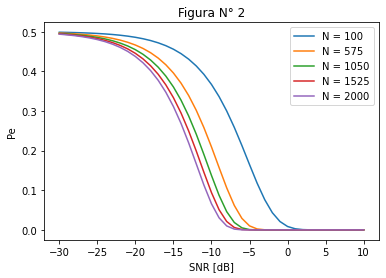

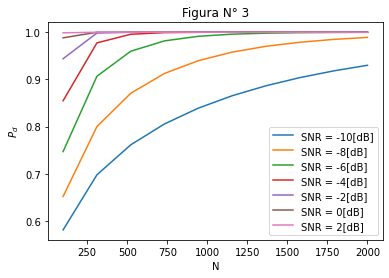

In [ ]:
varianza_ruido = 0.25
d = 1
#snr = np.arange(0.001, 10+d, d)
snr = np.arange(-30, 10+d, d)
N = np.linspace(100, 2000, 5)
for i,n_muestras in enumerate(N):
    pe = []
    x = []
    for j in range(len(snr)):
        SNRdB = snr[j]
        lambda_ = calc_lambda(n_muestras, varianza_ruido, SNRdB)
        pe.append(calc_prob_error(lambda_, n_muestras, varianza_ruido, SNRdB, PH0, PH1))
        x.append(SNRdB)
    plt.plot(x, pe, label='N = ' + str(int(n_muestras)))
plt.legend(loc ="upper right")
plt.title("Figura N° 2")
plt.ylabel("Pe")
plt.xlabel("SNR [dB]")
plt.show()


EbN0dB = np.arange(start=-10,stop = 3,step = 2)
N = np.linspace(100, 2000, 10)
for j in range(len(EbN0dB)):
    SNRdB = EbN0dB[j]
    pd = []
    x = []
    for i,n_muestras in enumerate(N):
        lambda_ = calc_lambda(n_muestras, varianza_ruido, SNRdB)
        Pd, Pm, Pf, Pe = calc_probs(lambda_, n_muestras, varianza_ruido, SNRdB, PH0, PH1)
        pd.append(Pd)
        x.append(n_muestras)
    plt.plot(x, pd, label='SNR = ' + str(SNRdB) + '[dB]')
plt.legend(loc ="lower right")
plt.title("Figura N° 3")
plt.ylabel("$P_{d}$")
plt.xlabel("N")
plt.show()

A continuación se utiliza la ecuación $(25)$ para obtener el periodo de detección mínimo (N) para cumplir con una restricción de $P_{f}^* = 0,1$ y $P_{m}^* = 0,1$ ($P_{d}^* = 0,9$) dada una relación señal ruido de $-4[dB]$ y $0[dB]$.

In [ ]:
SNRdB = -4
gamma = 10**(SNRdB/10)
N_min = 4*(special.erfcinv(2*0.1) - (gamma+1)*special.erfcinv(2*0.9))**2*gamma**(-2)
print("Para para Pf*=0.1, Pm*=0.1 con SNR = -4 [dB]")
print("Periodo minimo estimado = %f muestras" % N_min)

print('\n')
SNRdB = 0
gamma = 10**(SNRdB/10)
N_min = 4*(special.erfcinv(2*0.1) - (gamma+1)*special.erfcinv(2*0.9))**2*gamma**(-2)
print("Para para Pf*=0.1, Pm*=0.1 con SNR = 0 [dB]")
print("Periodo minimo estimado = %f muestras" % N_min)

Para para Pf*=0.1, Pm*=0.1 con SNR = -4 [dB]
Periodo minimo estimado = 119.189869 muestras


Para para Pf*=0.1, Pm*=0.1 con SNR = 0 [dB]
Periodo minimo estimado = 29.562739 muestras


Se puede observar que el valor obtenido está de acuerdo con las curvas obtenidas en la Figura N° 3.

Finalmente, se utilizan las ecuaciones $(26)$ a $(28)$ junto con las $(18)$ a $(21)$ para modelar la variación de la probabilidad de error, en función de la relación señal ruido, para distintos factores de incertidumbre de ruido ($\alpha$). Se cosidera un periodo de detección de 100 muestras.

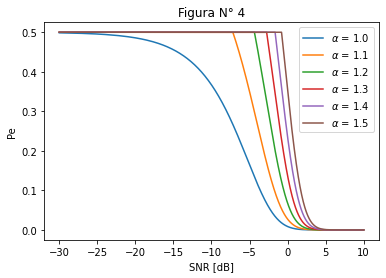

In [ ]:
def calc_lambda2(n_muestras, varianza_ruido, gamma, alpha):
    mu_0 = n_muestras*alpha*varianza_ruido
    varianza_0 = 2*(n_muestras*alpha**2)*varianza_ruido**2
    mu_1 = n_muestras*varianza_ruido*(gamma + alpha**(-1))
    varianza_1 = 2*n_muestras*(varianza_ruido**2)*(gamma + alpha**(-1))**2
    
    a = varianza_1 - varianza_0
    b = varianza_0*mu_1 - varianza_1*mu_0
    c = varianza_1*mu_0**2 - varianza_0*mu_1**2 - (2*varianza_1*varianza_0)*(np.log((np.sqrt(varianza_1))/(np.sqrt(varianza_0))))
    if b**2-(a*c) < 0:
        return 0
    lambda_ = (-b + np.sqrt(b**2-(a*c)))/a
    return lambda_

def calc_probs2(lambda_, n_muestras, varianza_ruido, gamma, alpha, PH0, PH1):
    mu_0 = n_muestras*alpha*varianza_ruido
    varianza_0 = 2*(n_muestras*alpha**2)*varianza_ruido**2
    mu_1 = n_muestras*varianza_ruido*(gamma + alpha**(-1))
    varianza_1 = 2*n_muestras*(varianza_ruido**2)*(gamma + alpha**(-1))**2
    
    Pd = (1/2)*special.erfc((lambda_-mu_1)/(np.sqrt(2*varianza_1)))
    Pm = (1 - Pd)
    Pf = (1/2)*special.erfc((lambda_-mu_0)/(np.sqrt(2*varianza_0)))
    Pe = PH0*Pf + PH1*Pm
    return Pd, Pm, Pf, Pe

d = 0.001
snr = np.arange(0.001, 10+d, d)
alpha = 1.0
varianza_ruido = 0.25
n_muestras = 100
for i in range(0, 6):
    pe = []
    x = []
    for j in range(len(snr)):
        gamma = snr[j]
        lambda_ = calc_lambda2(n_muestras, varianza_ruido, gamma, alpha)
        if lambda_ == 0:
            continue
        Pd, Pm, Pf, Pe = calc_probs2(lambda_, n_muestras, varianza_ruido, gamma, alpha, PH0, PH1)
        pe.append(Pe)
        x.append(10*np.log10(snr[j]))
    plt.plot(x, pe, label='$\\alpha$ = ' + str(np.round(alpha,1)))
    alpha += 0.1
plt.legend(loc ="upper right")
plt.title("Figura N° 4")
plt.ylabel("Pe")
plt.xlabel("SNR [dB]")
plt.show()

Las curvas obtenidas en la Figura N° 3 son similares a las de la Figura N° 2, sin embargo se puede observar que a medida que se aumenta el factor de incertidumbre de ruido, la probabilidad de error aumenta abruptamente a partir de un valor límite de relación señal ruido. En la Figura N° 2, en cambio, se observa un aumento gradual en la probabilidad de error a medida que disminuye la relación señal ruido. La Figura N° 3 predice que no es posible detectar la señal sin error, dado un valor límite de relación señal ruido.

### Simulación de transmisión y detección de energía

A continuación se simula la transmición y recepción de una señal modulada BPSK. A la señal transmitida se le suma una señal de ruido aditivo gausiano blanco, generada a partir de una relación señal ruido preestablecida. En el receptor se realiza la detección de energía a partir de la ecuación $(2)$ y se compara el estadístico $T_{d}$ con un valor de $\lambda$ calculado a partir de las ecuaciones $(18)$ a $(21)$. Para el calculo de $\lambda$, la varianza de ruido se obtiene a partir de la densidad espectral de rudio ($N_{0}$) obtenida a partir de la señal de ruido generada, de acuerdo a$^{[10]}$:

$$
  \sigma_{n}^2 = \frac{N_{0}}{2} \qquad\qquad\qquad\qquad\space (29)
$$

En un primer caso, se considera un periodo de detección de $100$ muestras y una relación señal ruido de $0\space[dB]$. Luego se evalua la calidad de la simulación obteniendo la probabilidad de error de bit (BER), $P_{b}$ para distintos valores de relación señal ruido. Los valores obtenidos son comparados con valores predichos de probabilidad de error de bit para modulación BPSK, de acuerdo a$^{[11]}$:

$$
  P_{b} = erfc\left(\sqrt{\frac{E_{b}}{N_{0}}}\right) \qquad\qquad (30)
$$

Luego se obtienen histogramas para el estadístico $T_{d}$ en presencia de señal ($H_{0}$) y ausencia de señal ($H_{1}$). Estos deben ser comparables con las funciones de densidad de probabilidad predichas por las ecuaciones $(3)$, $(4)$ y $(5)$.

Finalmente se calcula la probabilidad de detección, $P_{d}$ en función del periodo de detección, para diferentes valores de relación señal ruido.

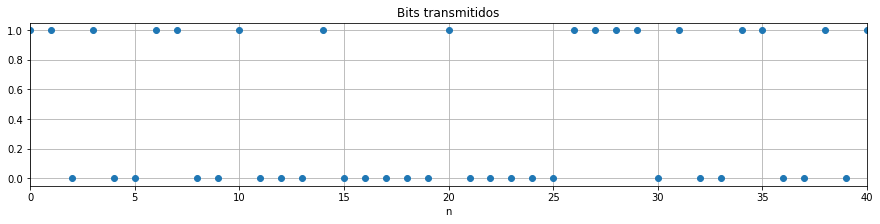

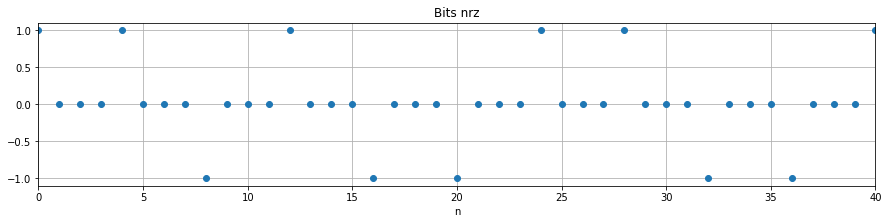

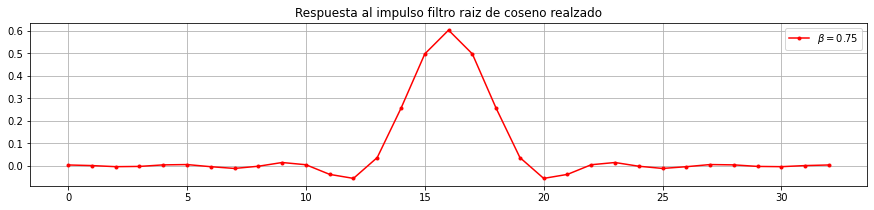

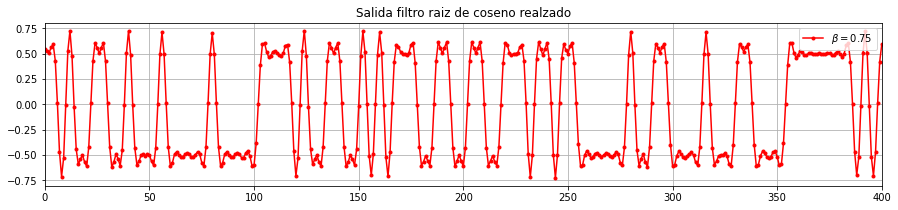

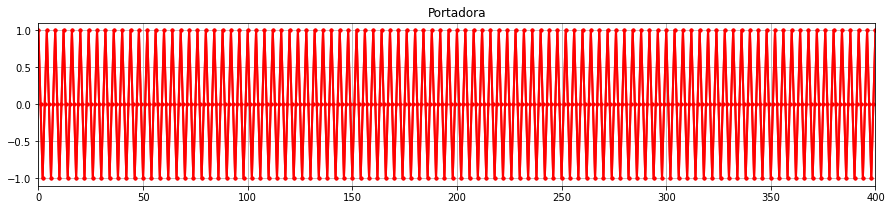

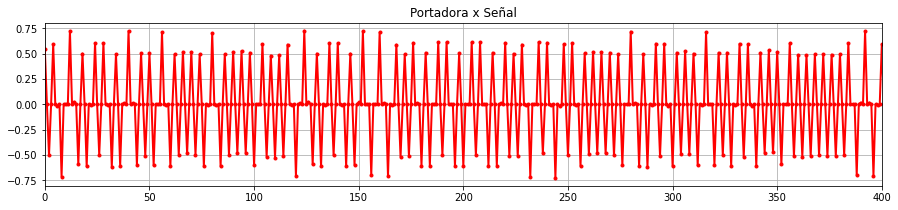

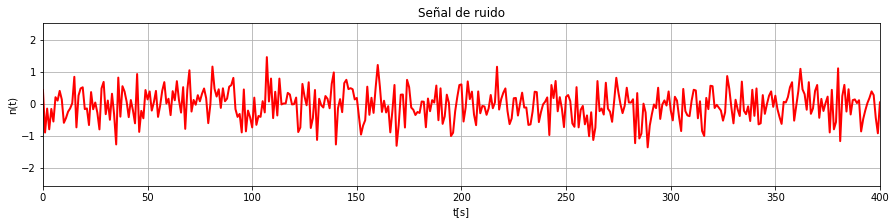

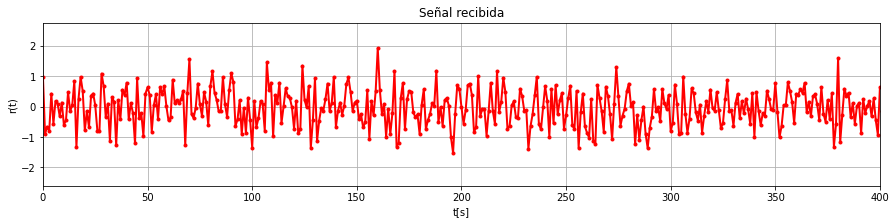

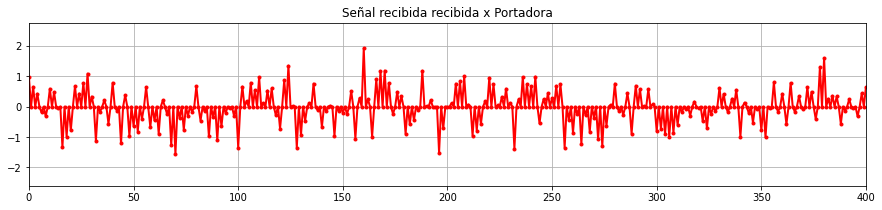

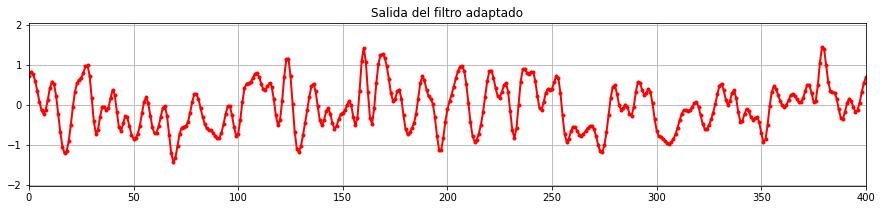

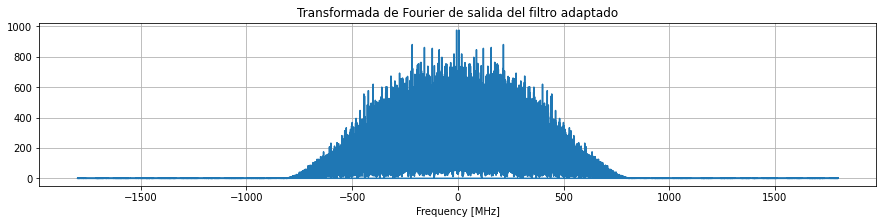

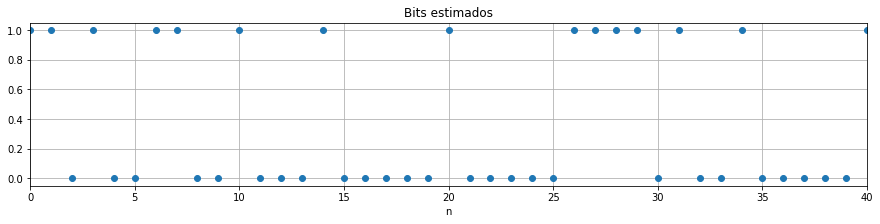

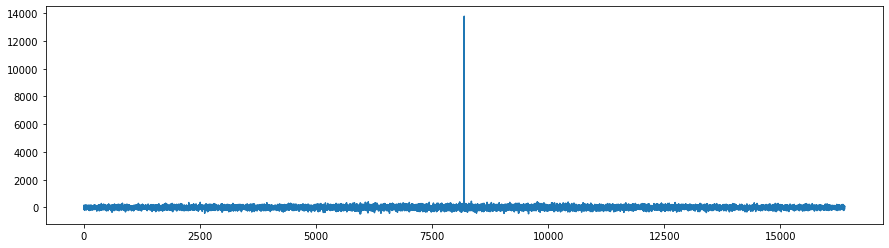

Resultados de simulacion

Bits transmitidos: 16384.000000
Bits errados: 1300.000000
BER: 7.934570%
EbN0_dB: 0.000000
N0: 0.499986
varianza ruido: 0.249993: 
muestras: 100.000000
Tdt: 38.469294
lambda: 27.974779
parseval_tiempo: 21824.753107
parseval_frecuencia: 21824.753107

Fin resultados de simulacion



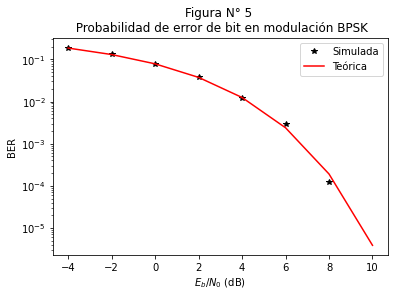

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import standard_normal
from scipy.fft import rfft, rfftfreq
from scipy.fft import fft, fftfreq
from scipy.special import erfc


def bpsk_demod(r_bb,L):
    x = np.real(r_bb)
    x = x[0:-1:L] if L > 1 else x # Downsampler
    ak_hat = (x > 0)
    return ak_hat
    
def awgn(s,SNRdB,L=1):
    gamma = 10**(SNRdB/10) 
    P=L*sum(abs(s)**2)/len(s) 
    N0=P/gamma 
    if np.isrealobj(s): # Verifica si la señal es real o compleja
        n = np.sqrt(N0/2)*standard_normal(s.shape) 
    else:
        n = np.sqrt(N0/2)*(standard_normal(s.shape)+1j*standard_normal(s.shape))
    r = s + n
    return r, n, N0

def rrcosdesign(beta,span,sps):
    index     = np.arange(-(span*sps)/2,(span*sps)/2+1,1)
    Ts        = sps
    rrcFilter = np.array([])

    for n in index:
        if beta == 0:
            aux       = np.sinc(n/Ts)/np.sqrt(Ts)
            rrcFilter = np.append(rrcFilter,aux)
        else:
            if n == Ts/(4*beta) or n == -Ts/(4*beta):
                aux       = beta*((np.pi+2)*np.sin(np.pi/(4*beta))+(np.pi-2)*np.cos(np.pi/(4*beta)))/(np.pi*np.sqrt(2*Ts))
                rrcFilter = np.append(rrcFilter,aux)
            else:
                a         = np.cos((1+beta)*np.pi*n/Ts)
                b         = (1-beta)*np.pi*np.sinc((1-beta)*n/Ts)/(4*beta)
                c         = 4*beta/(np.pi*np.sqrt(Ts))
                aux       = c*(a+b)/(1-(4*beta*n/Ts)**2)
                rrcFilter = np.append(rrcFilter,aux)
    return rrcFilter  


## Parametros funcionales
Nsymb = 2**14           # Numero de simbolos

sps         = 4        # Samples per symbol
span        = 8        # The filter is truncated to span symbols
beta        = 0.75     # Excess-bandwidth parameter

Fc = 900e6              # frecuencia de portadora
Fs=sps*Fc               # Frecuencia de muestreo

Nfreqs = Nsymb*sps      # Cantidad de frecuencias

N_muestras = 100
EbN0 = 0                # SNR en dB
Pf_est = 0.2

# Filtros y portadora
rc0 = rrcosdesign(beta,span,sps)                    # filtro raiz de coseno realzado
matchedFilter = np.conj(rrcosdesign(beta,span,sps)) # Filtro adaptado del receptor
t = np.arange(start = 0,stop = Nsymb*sps)
#t = np.linspace(0, Nsymb*sps, Nsymb*sps, endpoint='false')
carrier = np.cos(2*np.pi*Fc*t/Fs)                   # Portadora




# ---------- Transmisor ---------- #
# Se generan los bits a transmitir
bits = np.random.randint(0, 2, Nsymb)
plt.figure(figsize=[15,3])
plt.plot(bits,'o')
plt.xlim(0,10*sps)
plt.xlabel('n')
plt.title('Bits transmitidos')
plt.grid(True)
plt.show()

# Se codifican los bits como nrz
nrz_bits = np.array([])
for bit in bits:
    pulse      = np.zeros(sps)
    pulse[0]   = bit*2-1 
    nrz_bits = np.concatenate((nrz_bits, pulse))
    
plt.figure(figsize=[15,3])
plt.plot(nrz_bits,'o')
plt.xlim(0,10*sps)
plt.xlabel('n')
plt.title('Bits nrz')
plt.grid(True)
plt.show()


# Filtro raiz de coseno realzado
plt.figure(figsize=[15,3])
plt.plot(rc0, 'r.-', label=r'$\beta=%2.2f$'%beta)
plt.legend(loc='upper right')
plt.title('Respuesta al impulso filtro raiz de coseno realzado')
plt.grid(True)
plt.show()

# Se realiza la convolución con el filtro
symb_out0I = np.convolve(rc0, nrz_bits, 'same')
plt.figure(figsize=[15,3])
plt.plot(symb_out0I,'r.-', label=r'$\beta=%2.2f$'%beta)
plt.xlim(0,100*sps)
plt.grid(True)
plt.legend(loc='upper right')
plt.title('Salida filtro raiz de coseno realzado')
plt.show()

# Portadora
plt.figure(figsize=[15,3])
plt.plot(t, carrier,'r.-',linewidth=2.0)
plt.plot(carrier,'r.-',linewidth=2.0)
plt.xlim(0,100*sps)
plt.grid(True)
plt.title('Portadora')
plt.show()

# Se multiplica por la portadora para transmitir
symb_out0I_carry = symb_out0I*carrier
plt.figure(figsize=[15,3])
plt.plot(symb_out0I_carry,'r.-',linewidth=2.0)
plt.xlim(0,100*sps)
plt.grid(True)
plt.title('Portadora x Señal')
plt.show()
# ---------- Fin Transmisor ---------- #


# Se simula el canal AWGN
(r, noise, N0) = awgn(symb_out0I_carry,EbN0,sps)

# Señal de ruido
plt.figure(figsize=[15,3])
plt.plot(noise,'r-',linewidth=2.0)
plt.xlabel('t[s]')
plt.ylabel('n(t)')
plt.xlim(0,100*sps)
plt.title('Señal de ruido')
plt.grid(True)
plt.show()


# ---------- Receptor ---------- #
# Señal recibida con ruido
plt.figure(figsize=[15,3])
plt.plot(r,'r.-',linewidth=2.0)
plt.xlabel('t[s]')
plt.ylabel('r(t)')
plt.xlim(0,100*sps)
plt.title('Señal recibida')
plt.grid(True)
plt.show()

# Se multiplica por la portadora
sig_in0I = r*carrier
plt.figure(figsize=[15,3])
plt.plot(sig_in0I,'r.-',linewidth=2.0)
plt.xlim(0,100*sps)
plt.grid(True)
plt.title('Señal recibida recibida x Portadora')
plt.grid(True)
plt.show()

# Convolución con filtro adaptdo
symb_in0I = np.convolve(sig_in0I, matchedFilter, 'same')
plt.figure(figsize=[15,3])
plt.plot(symb_in0I,'r.-',linewidth=2.0)
plt.xlim(0,100*sps)
plt.grid(True)
plt.title('Salida del filtro adaptado')
plt.grid(True)
plt.show()

# Transformada de Fourier de la señal recibida
#symb_in0I_fft = rfft(symb_in0I)
symb_in0I_fft = fft(symb_in0I)
abs_fft = np.abs(symb_in0I_fft)
#xf = rfftfreq(Nfreqs, 1/Fs)
xf = fftfreq(Nfreqs, 1/Fs)
#xf= np.linspace(0, Fs/2, len(abs_fft))  # Mismo resultado que rfftfreq

plt.figure(figsize=[15,3])
plt.plot(xf/1e6,abs_fft)
#plt.xticks(np.arange(min(frec/1e6), max(frec/1e6), 0.25))
plt.xlabel("Frequency [MHz]")
plt.title('Transformada de Fourier de salida del filtro adaptado')
plt.grid()
plt.show()

# Demodulacion y desicion de simbolos
bits_hat = bpsk_demod(symb_in0I,sps)
plt.figure(figsize=[15,3])
plt.plot(bits_hat,'o')
plt.xlim(0,10*sps)
plt.xlabel('n')
plt.title('Bits estimados')
plt.grid(True)
plt.show()
# ---------- Fin Receptor ---------- #

plt.figure(figsize=[15,4])
plt.plot(np.correlate(nrz_bits[0:len(nrz_bits):sps], 2*(symb_in0I[0:len(symb_in0I):sps] > 0)-1,'same'))
plt.show()


#------- Resultados primera simulación ----------#
print("Resultados de simulacion\n")
error_bits = np.sum(bits != bits_hat)
BER = (error_bits/Nsymb)*100

print("Bits transmitidos: %f" %Nsymb)
print("Bits errados: %f" %error_bits)
print("BER: %f%%" %BER)

Tdt = np.sum(np.abs(r[:N_muestras])**2) 

l = (N0/2)*(special.erfcinv(2*Pf_est)*np.sqrt(N_muestras)*2+N_muestras)
#l = calc_lambda(N_muestras, N0/2, EbN0,)

print("EbN0_dB: %f" %EbN0)
print("N0: %f" %N0)
print("varianza ruido: %f: " %(N0/2))
print("muestras: %f" %N_muestras)
print("Tdt: %f" %Tdt)
print("lambda: %f" %l)

parseval_1 = np.sum(np.abs(symb_in0I)**2)
parseval_2 = (np.sum(abs_fft**2)) / Nfreqs                             # para fft
#parseval_2 = (abs_fft[0]**2 + 2 * np.sum(abs_fft[1:]**2)) / Nfreqs    # para rfft

print("parseval_tiempo: %f" %parseval_1)
print("parseval_frecuencia: %f" %parseval_2)
print("\nFin resultados de simulacion\n")
# ---------- Fin Resultados primera simulación ---------- #


# ---------- Curva BER ---------- #
EbN0dB = np.arange(start=-4,stop = 11,step = 2) 
BER = np.zeros(len(EbN0dB))
for i in range(len(EbN0dB)):
    (r, noise, N0) = awgn(symb_out0I_carry, EbN0dB[i], sps)
    sig_in0I = r*carrier
    symb_in0I = np.convolve(sig_in0I, matchedFilter, 'same')
    bits_hat = bpsk_demod(symb_in0I,sps) 
    BER[i] = np.sum(bits != bits_hat)/Nsymb

BERteorico = 0.5*erfc(np.sqrt(10**(EbN0dB/10)))

plt.semilogy(EbN0dB,BER,'k*',label='Simulada')
plt.semilogy(EbN0dB,BERteorico,'r-',label='Teórica')
plt.xlabel(r'$E_b/N_0$ (dB)')
plt.ylabel(r'BER')
plt.title('Figura N° 5 \n Probabilidad de error de bit en modulación BPSK')
plt.legend()
plt.show()
# ---------- Fin Curva BER ---------- #



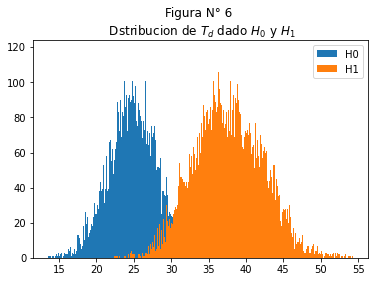

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

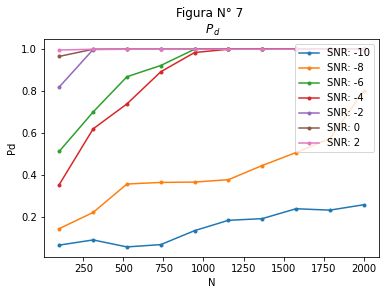

In [ ]:
# ---------- Distribución de Td dado H0 y H1 ---------- #
bits = np.random.randint(0, 2, Nsymb)
nrz_bits = np.array([])
for bit in bits:
    pulse      = np.zeros(sps)
    pulse[0]   = bit*2-1 
    nrz_bits = np.concatenate((nrz_bits, pulse))

symb_out0I = np.convolve(rc0, nrz_bits, 'same')
symb_out0I_carry = symb_out0I*carrier
(r, noise, N0) = awgn(symb_out0I_carry,EbN0,sps)
sig_in0I = r*carrier
symb_in0I = np.convolve(sig_in0I, matchedFilter, 'same')

Ts = []
Tn = []
m = 0
pruebas = Nsymb - N_muestras
#r = r[0:-1:sps]
for i in range(pruebas):
    Ts.append(np.sum(np.abs(r[m:m+N_muestras])**2))    
    Tn.append(np.sum(np.abs(noise[m:m+N_muestras])**2))
    m += 1   

plt.hist(Tn, bins=500, label='H0')
plt.hist(Ts, bins=500, label='H1')
plt.legend(loc='upper right')
plt.title('Figura N° 6 \n Dstribucion de $T_{d}$ dado $H_{0}$ y $H_{1}$')
plt.show()
#print('u0: %f' %(np.sum(Tn)/len(Tn)))
#print('u1: %f' %(np.sum(Ts)/len(Ts)))
display(Latex(f'$\mu_{0} = {np.sum(Tn)/len(Tn)}$'))
display(Latex(f'$\mu_{1} = {np.sum(Ts)/len(Ts)}$'))
# ---------- Fin Distribución de Td dado H0 y H1 ---------- #


# ---------- Estimación de Pd ---------- #
N_muestras = np.linspace(100, 2000, 10)
EbN0dB = np.arange(start=-10,stop = 3,step = 2) 
Obs = 3000
Pf_est = 0.1

for j,EbN0_ in enumerate(EbN0dB):
    bits = np.random.randint(0, 2, Nsymb)
    nrz_bits = np.array([])
    for bit in bits:
        pulse      = np.zeros(sps)
        pulse[0]   = bit*2-1 
        nrz_bits = np.concatenate((nrz_bits, pulse))

    symb_out0I = np.convolve(rc0, nrz_bits, 'same')
    symb_out0I_carry = symb_out0I*carrier
    (r, noise, N0) = awgn(symb_out0I_carry,EbN0_,sps)

    Pd = np.zeros(len(N_muestras))
    
    for i in range(len(N_muestras)):
        detecciones = 0
        m = 0
        for j in range(Obs):
            Td = np.sum(np.abs(r[m:int(m+N_muestras[i])])**2)
            l = (N0/2)*(special.erfcinv(2*Pf_est)*np.sqrt(N_muestras[i])*2+N_muestras[i])
            #l = calc_lambda(N_muestras[i], N0/2, EbN0_)
            detecciones += 1 if Td >= l else 0
            m += 1
        Pd[i] = detecciones/Obs
    plt.plot(N_muestras, Pd, '.-', label='SNR: ' + str(EbN0_))
plt.legend(loc='upper right')
plt.xlabel('N')
plt.ylabel('Pd')
plt.title('Figura N° 7 \n $P_{d}$')
plt.show()



Los resultados de simulación predicen que es posible detectar la señal transmitida con los parámetros establecidos. Se transmitieron $2^{14}$ bits y se generó una señal de ruido de densidad espectral de potencia $(N_{0})$ igual a $0.499981$ y vaianza $(\sigma_{n}^2)$ igual a 0.249990, dada una relación señal ruido de $0\space[dB]$ (relación $1:1$). Se tomaron 100 muestras de la señal recibida y, después de realizar downsampling, se calculó un valor de $T_{d}$ igual a $65.356374$. Este valor se comparó con un valor de umbral $(\lambda)$ de $34.011332$, obtenido a partir de las ecuaciones $(18)$ a $(21)$. La detección de la señal está de acuerdo con el resultado obtenido según la ecuación $(25)$, que estimó una cantidad de $29$ muestras para obtener una probabilidad de detección mayor o igual a $0,9$, dada una relación señal ruido de $0\space[dB]$. El resultado obtenido también está de acuerdo con las predicciones que muestran las Figuras N° 2 y N° 3. La calidad de la simulación se verificó corroborando el cumplimiento del teorema de Parseval para la señal recibida y mediante el calculo de diferentes probabilidades de error de bit (BER) para distintas señales de ruido generadas según valores de SNR (Figura N° 5). Se puede observar que los resultados obtenidos están de acuerdo con los valores de BER teóricos, predichos según la ecuación $(30)$.

La Figura N° 6 muestra los histogramas obtenidos con $2^{14}-100$ observaciones para el estadístico $T_{d}$, en caso de cumplirse la hipótesis nula (ausencia de señal, $H_{0}$) y en caso de cumplirse la hipótesis alternativa (presencia de señal, $H_{1}$). Se puede observar la similitud entre las Figuras N° 1 y N° 7. La curva obtenida en la Figura N° 1 para $T_{d}$ dado $H_{0}$ es prácticamente un envolvente del histograma obtendio para $T_{d}$ dado $H_{0}$ en la Figura N° 7. Esto es debido a que la señal de ruido es generada a partir de la ecuación para la distribución normal. La media del histograma obtenido para $T_{d}$ dado $H_{1}$ $(61,7)$ difiere de la media obtenida para la curva de $T_{d}$ dado $H_{1}$ $(50)$ en un $23,4$%. Este resultado indica que, en principio, asumir que $T_{d}$ presenta una distribución gausiana a partir de un número dado de observaciones parece ser una suposición válida.

Finalmente, la Figura N° 7 muestra como varía la probabilidad de detección en función del número de observaciones, para diferentes valores de relación señal ruido. Se puede observar la similitud entre los resultados obtenidos y la Figura N° 3. Si bien las curvas en ambas figuras no presentan exactamente los mismos valores, ambas predicen el mismo comportamiento y tienen la misma tendencia. En ambos casos se puede observar que, para valores de SNR mayores a $-2\space[dB]$ se tiene alta probabilidad de detectar la señal, incluso para valores pequeños de periodo de detección.

### Conclusiones

Se llevó a cabo una revisión del método de detección de energía para el sensado del espectro. En primer lugar se analizó la teoría del modelo y se obtuvieron diferentes curvas que predicen el resultado de llevar a cabo la detección de energía, para diferentes situaciones de toma de muestras y relación señal ruido. Se analizaron las dependencias entre los parámetros más significativos del modelo y se analizaron las probabilidades de error y detección en función de los mismos. Finalmente se llevaron a cabo simulaciones para corroborar la eficiencia y veracidad del modelo analizado. Se logró comprobar que los resultados de simulación estan de acuerdo con el comportamiento predicho por el modelo. 

### Referencias

[1] N. Kassri1, A. Ennouaary, S. Bah, H. Baghdadi. A Review on SDR, Spectrum Sensing, and CR-based IoT in Cognitive Radio Networks. International Journal of Advanced Computer Science and Applications. 2021, 12, 100-121.

[2] B. Hoedzoade, C. M. Akujuobi. Performance Evaluation of Spectrum Sensing Implementation Using Energy Detection Method. American Society for Engineering Education. 2022.

[3] A. Coluccia, A. Fascista, G. Ricci. Spectrum sensing by higher-order SVM-based detection. 27th European Signal Processing Conference (EUSIPCO). 2019.

[4] R. B. Patil, K. D. Kulat, A. S. Gandhi. SDR Based Energy Detection Spectrum Sensing in Cognitive Radio for Real Time Video Transmission. Modelling and Simulation in Engineering. 2018.

[5] K. kockaya1, I. Develi. Spectrum sensing in cognitive radio networks: threshold optimization and analysis. Journal on Wireless Communications and Networking. 2020, 255.

[6] M. A. Abdulsattar, Z. A. Hussein. Energy Detection Technique For Spectrum Sensing In Cognitive Radio: A Survey. International Journal of Computer Networks & Communications (IJCNC). 2012, 4, 223-242.

[7] D. Mercedes Martínez Plataa, A. G. Andrade Reátiga. Evaluation of energy detection for spectrum sensing based on the dynamic selection of detection-threshold. Procedia Engineering. 2012, 35, 135-143.

[8] A. S. B. Kozal, M. Merabti, F. Bouhafs. An Improved Energy Detection Scheme for Cognitive Radio Networks in Low SNR Region. IEEE. 2012

[9] Z. Xuping, P. Jianguo. Energy-Detection Based Spectrum Sensing for Cognitive Radio. 2007 IET Conference on Wireless, Mobile and Sensor Networks (CCWMSN07). 2009.

[10] B. Rimoldi. Principles of Digital Communication A Top-Down Approach. Cambridge University Press. 2016.

[11] M. Viswanathan. Digital Modulations using Python. 2019.